# Ejercicio 57
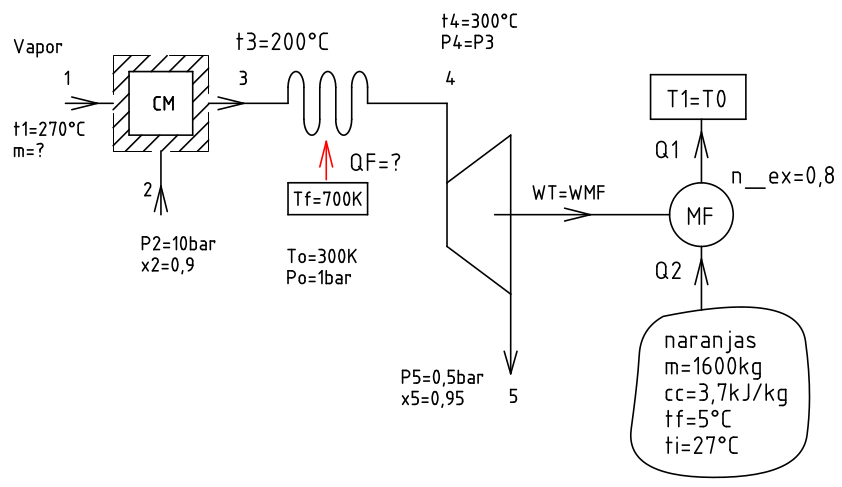

__Determinar:__
1. $\Delta S_u$
2. $\eta_{ex,proc}$
3. $\eta_{iso,turb}$ y $\eta_{ex,turb}$

## Solución

### Máquina térmica

$$ Q_2 = m c_c (T_f - T_i) \tag{1} $$

$$ \Delta s_2 = \int_{T_i}^{T_f} \frac{\delta Q}{T} = \int_{T_i}^{T_f} c_c \, \frac{dt}{T} $$

$$ \Delta s_2 = c_c (\ln T_f - \ln T_i) $$

$$ \Delta S_2 = m c_c \ln \frac{T_f}{T_i} \tag{2} $$

In [ ]:
import numpy as np

In [ ]:
# Datos:
m = 1600 # [kg]
cc = 3.7e3 # [J/kg]
T_f = 5 + 273.15 # [K]
T_i = 27 + 273.15 # [K]
T_0 = 300 # [K]
n_ex = 0.8

In [ ]:
Q_2 = m*cc*(T_f - T_i)
DS_2 = m*cc*np.log(T_f/T_i)

In [ ]:
#@title
print('Q_2 = %.0f [kJ]'%(Q_2/1000))
print('DS_2 = %.2f [kJ/kg]'%(DS_2/1000))

Q_2 = -130240 [kJ]
DS_2 = -450.64 [kJ/kg]


$$ Q_{U2} = Q_2 - T_0 \Delta S_2 \tag{3} $$

In [ ]:
Q_U2 = Q_2 - T_0*DS_2

In [ ]:
#@title
print('Q_U2 = %.2f [kJ]'%(Q_U2/1000))

Q_U2 = 4952.34 [kJ]


$$ \eta_{ex} = \frac{Q_{U2}}{W_{MF}} $$

Despejo $W_{MF}$

$$ W_{MF} = \frac{Q_{U2}}{\eta_{ex}} \tag{4} $$

In [ ]:
W_MF = Q_U2/n_ex

In [ ]:
#@title
print('W_MF = %.2f [kJ]'%(W_MF/1000))

W_MF = 6190.43 [kJ]


### Turbina

In [ ]:
# Datos:
P_2 = 10e5 # [Pa]
P_4 = P_2 # [Pa]
T_4 = 300 + 273.15 # [K]
P_5 = 0.5e5 # [Pa]
x_5 = 0.95

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

In [ ]:
h_4 = cp.PropsSI('H','P',P_4,'T',T_4,'Water')
s_4 = cp.PropsSI('S','P',P_4,'T',T_4,'Water')

In [ ]:
#@title
print('h_4 = %.2f [kJ/kg]'%(h_4/1000))
print('s_4 = %.5f [kJ/(kg·K)]'%(s_4/1000))

h_4 = 3051.63 [kJ/kg]
s_4 = 7.12462 [kJ/(kg·K)]


$$ h_5 = x_5 (h'' - h') + h' \tag{5}$$

$$ s_5 = x_5 (s'' - s') + s' \tag{6} $$

In [ ]:
# Para el punto 5
hp1 = cp.PropsSI('H','P',P_5,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_5,'Q',1,'Water')
sp1 = cp.PropsSI('S','P',P_5,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P_5,'Q',1,'Water')
T_5 = cp.PropsSI('T','P',P_5,'Q',x_5,'Water')

In [ ]:
#@title
print('hp1 = %.2f [kJ/kg]  (Líquido saturado)'%(hp1/1000))
print('hp2 = %.2f [kJ/kg]  (Vapor saturado)'%(hp2/1000))
print('sp1 = %.5f [kJ/(kg·K)]  (Líquido saturado)'%(sp1/1000))
print('sp2 = %.5f [kJ/(kg·K)]  (Vapor saturado)'%(sp2/1000))
print('T_5 = %.2f [K]'%T_5)
print('t_5 = %.2f [°C]'%(T_5 - 273.15))

hp1 = 340.54 [kJ/kg]  (Líquido saturado)
hp2 = 2645.22 [kJ/kg]  (Vapor saturado)
sp1 = 1.09120 [kJ/(kg·K)]  (Líquido saturado)
sp2 = 7.59300 [kJ/(kg·K)]  (Vapor saturado)
T_5 = 354.47 [K]
t_5 = 81.32 [°C]


In [ ]:
h_5 = x_5*(hp2 - hp1) + hp1
s_5 = x_5*(sp2 - sp1) + sp1

In [ ]:
#@title
print('h_5 = %.2f [kJ/kg]'%(h_5/1000))
print('s_5 = %.5f [kJ/(kg·K)]'%(s_5/1000))

h_5 = 2529.98 [kJ/kg]
s_5 = 7.26791 [kJ/(kg·K)]


In [ ]:
# También se puede hacer
h_5 = cp.PropsSI('H','P',P_5,'Q',x_5,'Water')
s_5 = cp.PropsSI('S','P',P_5,'Q',x_5,'Water')

$$ W_{MF} = -W_T \tag{7} $$

$$ W_T = m_4 (h_5 - h_4) $$

$$ m_4 = \frac{-W_T}{h_5 - h_4} \tag{8} $$

In [ ]:
W_T = -W_MF
m_4 = W_T/(h_5 - h_4)

In [ ]:
#@title
print('m_4 = %.3f [kg/s]'%m_4)

m_4 = 11.867 [kg/s]


### Intercambiador de calor

In [ ]:
# Datos:
P_3 = 10e5 # [Pa]
T_3 = 200 + 273.15 # [K]

In [ ]:
cp.PhaseSI('P',P_3,'T',T_3,'Water')

'gas'

In [ ]:
h_3 = cp.PropsSI('H','P',P_3,'T',T_3,'Water')
s_3 = cp.PropsSI('S','P',P_3,'T',T_3,'Water')

In [ ]:
#@title
print('h_3 = %.2f [kJ/kg]'%(h_3/1000))
print('s_3 = %.5f [kJ/(kg·K)]'%(s_3/1000))

h_3 = 2828.26 [kJ/kg]
s_3 = 6.69554 [kJ/(kg·K)]


$$ \Delta H_{34} = \dot{m}_3 (h_4 - h_3) = -Q_F $$

Entonces
$$ Q_F = \dot{m}_3 (h_3 - h_4) \tag{9} $$

In [ ]:
m_3 = m_4
Q_F = m_3*(h_3 - h_4)

In [ ]:
#@title
print('Q_F = %.2f [kJ/s]'%(Q_F/1000))

Q_F = -2650.70 [kJ/s]


### Cámara de mezcla

In [ ]:
# Datos:
T_1 = 270 + 273.15 # [K]
x_2 = 0.9
T_3 = 200 + 273.15 # [K]

In [ ]:
P_1 = P_2
P_3 = P_2

In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI('S','P',P_1,'T',T_1,'Water')

In [ ]:
#@title
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))
print('s_1 = %.5f [kJ/(kg·K)]'%(s_1/1000))

h_1 = 2986.94 [kJ/kg]
s_1 = 7.00869 [kJ/(kg·K)]


$$ h_2 = x_2 (h'' - h') + h' \tag{10}$$

$$ s_2 = x_2 (s'' -s') + s' \tag{11}$$

In [ ]:
h_2 = cp.PropsSI('H','P',P_2,'Q',x_2,'Water')
s_2 = cp.PropsSI('S','P',P_2,'Q',x_2,'Water')

In [ ]:
#@title
print('h_2 = %.2f [kJ/kg]'%(h_2/1000))
print('s_2 = %.5f [kJ/(kg·K)]'%(s_2/1000))

h_2 = 2575.65 [kJ/kg]
s_2 = 6.14032 [kJ/(kg·K)]


$$\left\{
\begin{array}{l}
m_1 + m_2 = m_3 \\
m_1 h_1 + m_2 h_2 = m_3 h_3
\end{array}
\right. \tag{12}$$

Resolvemos el sistema de ecuaciones por sustitución
$$ m_2 = m_3 - m_1 $$

$$ m_1 h_1 + (m_3 - m_1)h_2 = m_3 h_3 $$

Despejando $m_1$
$$ m_1 = - \frac{(h_3 - h_2) \, m_3}{h_2 - h_1} $$

In [ ]:
m_1 = -(h_3 - h_2)*m_3/(h_2 - h_1)
m_2 = m_3 - m_1

In [ ]:
#@title
print('m_1 = %.3f [kg/s]'%m_1)
print('m_2 = %.3f [kg/s]'%m_2)

m_1 = 7.289 [kg/s]
m_2 = 4.578 [kg/s]


Resolvemos el sistema de ecuaciones en forma matricial

$$M_{10} = \pmatrix{1 & 1 \\
h_1 & h_2} \quad ; \quad R_{10} = \pmatrix{m_3 \\ m_3 h_3} $$

$$ S_{10} = M_{10}^{-1} \cdot R_{10} $$

In [ ]:
M10 = np.matrix([[1,1],[h_1,h_2]])
R10 = np.matrix([[m_3],[m_3*h_3]])

In [ ]:
S10 = np.linalg.inv(M10)*R10

In [ ]:
S10

matrix([[7.28869498],
        [4.57829486]])

In [ ]:
m_1 = S10[0,0]
m_2 = S10[1,0]

In [ ]:
#@title
print('m_1 = %.3f [kg/s]'%m_1)
print('m_2 = %.3f [kg/s]'%m_2)

m_1 = 7.289 [kg/s]
m_2 = 4.578 [kg/s]


### Rendimiento isoentrópico de la turbina

$$ \eta_{iso} = \frac{h_4 - h_5}{h_4 - h_{5rev}} \tag{13}$$

Averiguamos $x_{5rev}$
$$ x_{5rev} = \frac{s_{5rev} - s'}{s'' - s'} \tag{14} $$

In [ ]:
s_5rev = s_4
cp.PhaseSI('P',P_5,'S',s_5rev,'Water')

'twophase'

In [ ]:
x_5rev = cp.PropsSI('Q','P',P_5,'S',s_5rev,'Water')

In [ ]:
#@title
print('x_5rev = %.4f'%x_5rev)

x_5rev = 0.9280


In [ ]:
h_5rev = cp.PropsSI('H','P',P_5,'Q',x_5rev,'Water')

In [ ]:
#@title
print('h_5rev = %.2f [kJ/kg]'%(h_5rev/1000))

h_5rev = 2479.19 [kJ/kg]


In [ ]:
n_iso = (h_4 - h_5)/(h_4 - h_5rev)

In [ ]:
#@title
print('n_iso = %.4f'%n_iso)

n_iso = 0.9113


### Rendimiento exergérico de la turbina

$$ \eta_{ex,turb} = \frac{W_T}{m_4[(h_5 - h_4) - T_0(s_5 -s_4)]} \tag{15}$$

In [ ]:
n_exturb = W_T/(m_4*((h_5 - h_4) - T_0*(s_5 - s_4)))

In [ ]:
#@title
print('n_exturb = %.4f'%n_exturb)

n_exturb = 0.9239


### Variaciones de entropía

$$ W_{MF} = Q_1 + Q_2 \tag{16} $$

Despejo $Q_1$
$$ Q_1 = W_{MF} - Q_2 $$

In [ ]:
Q_1 = W_MF - Q_2

In [ ]:
#@title
print('Q_1 = %.1f [kJ]'%(Q_1/1000))

Q_1 = 136430.4 [kJ]


$$ \Delta S_1 = \frac{Q_1}{T_0} \tag{17} $$

In [ ]:
DS_1 = Q_1/T_0

In [ ]:
#@title
print('DS_1 = %.2f [kJ/K]'%(DS_1/1000))

DS_1 = 454.77 [kJ/K]


$$ \Delta S_F = \frac{Q_F}{T_F} \tag{18} $$

In [ ]:
# Dato:
T_F = 700 # [K]
DS_F = Q_F/T_F

In [ ]:
#@title
print('DS_F = %.3f [kJ/K]'%(DS_F/1000))

DS_F = -3.787 [kJ/K]


$$ \Delta S_{15} = m_1 (s_5 - s_1) \tag{19} $$

$$ \Delta S_{25} = m_2 (s_5 - s_2) \tag{20} $$

In [ ]:
DS_15 = m_1*(s_5 - s_1)
DS_25 = m_2*(s_5 - s_2)

In [ ]:
#@title
print('DS_15 = %.4f [kJ/K]'%(DS_15/1000))
print('DS_25 = %.4f [kJ/K]'%(DS_25/1000))

DS_15 = 1.8894 [kJ/K]
DS_25 = 5.1624 [kJ/K]


$$ \Delta S_u = \Delta S_{15} + \Delta S_{25} + \Delta S_F + \Delta S_2 + \Delta S_1 \tag{21}$$

In [ ]:
DS_u = DS_15 + DS_25 + DS_F + DS_2 + DS_1

In [ ]:
#@title
print('DS_u = %.4f [kJ/K]'%(DS_u/1000))

DS_u = 7.3921 [kJ/K]


### Variaciones de exergía

$\begin{array}{l}
\Delta Ex_{14} = m_1 (h_4 - h_1) - m_1 T_0 (s_4 - s_1) \\
\Delta Ex_{24} = m_2 (h_4 - h_2) - m_2 T_0 (s_4 - s_2) \\
\Delta Ex_{45} = m_4 (h_5 - h_4) - m_4 T_0 (s_5 - s_4) \\
\end{array} \tag{22}$

In [ ]:
DEx_14 = m_1*(h_4 - h_1) - m_1*T_0*(s_4 - s_1)
DEx_24 = m_2*(h_4 - h_2) - m_2*T_0*(s_4 - s_2)
DEx_45 = m_4*(h_5 - h_4) - m_4*T_0*(s_5 - s_4)

In [ ]:
#@title
print('DEx_14 = %.4f [kJ/K]'%(DEx_14/1000))
print('DEx_24 = %.4f [kJ/K]'%(DEx_24/1000))
print('DEx_45 = %.4f [kJ/K]'%(DEx_45/1000))

DEx_14 = 218.0023 [kJ/K]
DEx_24 = 827.2626 [kJ/K]
DEx_45 = -6700.5417 [kJ/K]


### Rendimiento exergético de proceso

$$ \eta_{ex,proc} = \frac{\Delta Ex_{14} + \Delta Ex_{24} + Q_{U2}}{|\Delta Ex_{45} + Q_F|} \tag{23}$$

In [ ]:
n_exproc = (DEx_14 + DEx_24 + Q_U2)/abs(DEx_45 + Q_F)

In [ ]:
#@title
print('n_exproc = %.4f'%n_exproc)

n_exproc = 0.6414
